# GRegulNet

## Gene Regular(ized/atory) Network

#### By: Saniya Khullar, Xiang Huang, Daifeng Wang
##### Daifeng Wang Lab

## Summary

Regression techniques often face the challenge of dealing with correlated predictors, which can lead to unreliable model estimates. In biology, the variables are usually highly interconnected, and the relationships between them are complex and non-linear, making it difficult to obtain accurate regression models without incorporating prior knowledge. Traditional regression methods may not consider the potential impact of correlated predictors, including those representing Transcription Factors that regulate target genes in gene regulatory networks (GRNs), for instance. Network-constrained regularization addresses this issue by imposing constraints on the regression coefficients based on a network structure, ensuring that the model is consistent with the underlying biology and reducing the risk of overfitting to noise. In recent years, several software packages, including GRegulNet, have been developed that implement network-constrained regularization approaches for biological applications. These methods enable the identification of complex and non-linear relationships between variables, which traditional regression methods may miss. GRegulNet incorporates information from a prior network to improve predictions and is particularly useful for analyzing biological data. By leveraging the underlying network structure, network-constrained regularization methods can help identify relationships, highlight important nodes and edges in the network, provide insight into the underlying biological processes, and improve model accuracy and biological/clinical significance of the models. GRegulNet can be applied to other biological and non-biological applications, and for various types of network-based learning tasks where predictors are correlated or interconnected. In summary, network-constrained regularization is essential in biological applications, as it enables the construction of more accurate and interpretable models that incorporate prior knowledge of the biological network structure. GRegulNet is a critical tool that allows for the incorporation of multiple types of network data, including protein-protein interaction networks, GRNs, and metabolic networks, leading to better understanding of complex biological systems. Overall, incorporating network-constrained regularization using tools such as GRegulNet is a critical step towards improving the accuracy and interpretability of regression models in biological and other applications.

## Pipeline

*Pipeline image of Gregulnet*

Alternate names:
* LassoRegNet
* LassoNet

## Hardware Requirements

The analysis is based on Python 3.10.6. Please note that larger prior graph networks may require more memory, space, and time. We anticipate that you would only need a standard computer with enough RAM to support the operations. A Linux system with 32 GB RAM and 32GB storage would be enough to support GRegulNet. 

## Software Requirements


Please open a terminal window or command prompt window and navigate to your project directory using the command line or terminal.

Please ensure you have cloned or downloaded our GRegulNet Github code and package.  We have provided a *requirements.txt* file, which lists the key packages and respective versions needed. To install these packages properly, please run the following command in the terminal or command prompt window to install the packages specified in the *requirements.txt* file:

**pip install -r requirements.txt**

This command will install all the packages listed in the *requirements.txt* file, including any specified versions or dependencies.

In short, please note that we need to import the following Python packages needed to run our code:

* matplotlib.pyplot, networkx, numpy, numpy.typing, os, pandas, plotly.express, random, scipy, sklearn, sys, tqdm, warnings

To install these packages manually, please run *pip install [package]* or *pip3 install [package]* in the terminal or run *conda install [package]* in the Anaconda prompt.

## Functions in the GRegulNet pipeline


<!-- 
# * parameter 1: edge_list
# * beta_network_val
# * alpha_lasso_val, beta_network_val.  -->

Please note that our package, GRegulNet, is run by the following function **geneRegulatNet** in Python.

The function, **geneRegulatNet**, inputs the edge list of the prior graph network (to be used to constrain the model via network-based regularization) and a beta_network_val ($\beta_{network} \geq 0$) that scales the network-based regularization penalty. The user has 2 options with respect to the lasso regularization on the overall model: 
* default option: the user may  specify an alpha_lasso_val ($\alpha_{lasso} \geq 0$) manually (if *cv_for_alpha_lasso_model_bool = False*). If no alpha_lasso_val is specified, 0.1 will be used as the default. 
* alternative option: the user may opt for GRegulNet to select the alpha_lasso_val ($\alpha_{lasso} \geq 0$) based on cross-validation on the training data (if *cv_for_alpha_lasso_model_bool = True*)

Ultimately, this function builds an estimator object from the class GRegulNet. This estimator is then able to take in input $X$ and $y$ data and transform those data inputs (to $\tilde{X}$ and $\tilde{y}$, respectively) based on the prior network edge lists and $\beta_{network}$ value. Next, the estimator can fit a Lasso regression model on $\tilde{X}$ and $\tilde{y}$ using the regularization value of alpha_lasso_val ($\alpha_{lasso} \geq 0$), which is either provided by the user (if *cv_for_alpha_lasso_model_bool = False*) or determined by GRegulNet (based on cross-validation on training data, if *cv_for_alpha_lasso_model_bool = True*). Overall, the trained and fitted models are more reflective of an underlying network structure among predictors and may be more biologically meaningful and interpretable. 


**geneRegulatNet**:

The basic version of geneRegulatNet requires that the user is aware of at least the following 4 parameters, which we list and explain in the *Main Input* section. That is, *geneRegulatNet(edge_list, beta_network_val, cv_for_alpha_lasso_model_bool, alpha_lasso_val)*. At minimum, the user needs to specify just 3 parameters. 

$$
\begin{cases}
  \text{geneRegulatNet(edge_list, } \beta_{network}, \text{cv_for_alpha_lasso_model_bool = } False, \alpha_{lasso}\text{)} & \text{if cv_for_alpha_lasso_model_bool = } False \\
  \text{geneRegulatNet(edge_list, } \beta_{network}, \text{cv_for_alpha_lasso_model_bool = } True) & \text{if cv_for_alpha_lasso_model_bool = } True \\
\end{cases}
$$

There are several additional parameters that can be adjusted in the geneRegulatNet function, which will be explained later in the *Default Parameters* section. 

### Main Input:

* *edge_list*: A list of lists corresponding to a prior network involving the predictors (as nodes) and relationships among them as edges. We will utilize this prior network to constrain our machine learning model. For instance, this could be a Protein-Protein Interaction (PPI) network of interactions among the predictors. If the weights are missing for any edge, then the default_weight will be used for that respective edge. We assume that this network is undirected and thereby symmetric, so the user only needs to specify edges in 1 direction (and the other direction will be assumed automatically). 

For instance:

[[source$_{1}$, target$_{1}$, weight$_{1}$], [source$_{2}$, target$_{2}$, weight$_{2}$], ..., [source$_{Z}$, target$_{Z}$, weight$_{Z}$]]. 

Where weight$_{1}$, weight$_{2}$, ..., weight$_{3}$ are optional. If an edge is missing its respective edge weight, then the default edge weights will be utilized. 

The edge_list will be represented by:

| Source | Target |  Weight |
| --------- | ---------- | ---------- |
|source$_{1}$    | target$_{1}$ | weight$_{1}$ |
|source$_{2}$    | target$_{2}$ | weight$_{2}$ |
|...    | ... | ... |
|source$_{Z}$    | target$_{Z}$ | weight$_{Z}$ |
|target$_{1}$    | source$_{1}$ | weight$_{1}$ |
|target$_{2}$    | source$_{2}$ | weight$_{2}$ |
|...    | ... | ... |
|target$_{Z}$    | source$_{Z}$ | weight$_{Z}$ |

* *beta_network_val*:  A numerical value for $\beta_{network} \geq 0$. 

<!-- * *cv_for_alpha_lasso_model_bool*: A boolean value (True or False). This parameter asks the user if the user wants GRegulNet to perform cross-validation (CV) on the training data to determine the optimal alpha_lasso_val ($\alpha_{lasso} \geq 0$). The default value is False, which means that the user wants to specify the value of $\alpha_{lasso}$.  -->

* *cv_for_alpha_lasso_model_bool*:

$$ = \begin{cases}
  \text{if cv_for_alpha_lasso_model_bool = } False & \text{default: user wants to specify the value of }  \alpha_{lasso}  \\
  \text{if cv_for_alpha_lasso_model_bool = } True & \text{GRegulNet will perform cross-validation (CV) on training data to determine optimal } \alpha_{lasso} \\
\end{cases}
$$



<!-- $$ = \begin{cases}
  \text{default: user wants to specify the value of }  \alpha_{lasso} & \text{if cv_for_alpha_lasso_model_bool = } False \\
  \text{GRegulNet will perform cross-validation (CV) on training data to determine optimal } \alpha_{lasso} & \text{if cv_for_alpha_lasso_model_bool = } True \\
\end{cases}
$$
 -->
##### If *cv_for_alpha_lasso_model_bool* is False, we need to specify alpha_lasso_val $\alpha_{lasso}$ #####

* *alpha_lasso_val*:  A numerical value for $\alpha_{lasso} \geq 0$. Thus, if *cv_for_alpha_lasso_model_bool* is False, the user is then advised to specify this $\alpha_{lasso}$ parameter (alpha_lasso_val). Otherwise, please note that if no $\alpha_{lasso}$ value is specified, then the default value of $\alpha_{lasso} = 0.1$ will be used. 


### Summary of main inputs needed:
| Parameter | Definition | Default |
| --------- | ---------- | ---------- |
| edge_list       | list of lists: [[source$_{1}$, target$_{1}$, weight$_{1}$], ..., [source$_{Z}$, target$_{Z}$, weight$_{Z}$]] | value needed |
| $\beta_{network}$  | Regularization parameter for network penalization | value needed |
| cv_for_alpha_lasso_model_bool  | Should GRegulNet perform Cross Validation to determine $\alpha_{lasso}$  | False |
| $\alpha_{lasso}$  | Regularization parameter for lasso | value needed if cv_for_alpha_lasso_model_bool = False; default: 0.1 |




                 

<!-- Hence, please note that these are the minimum arguments needed:
 -->
<!-- geneRegulatNet(edge_list, beta_network_val, cv_for_alpha_lasso_model_bool = False, alpha_lasso_val)
 -->




<!-- $$
\begin{cases}
  \text{geneRegulatNet(edge_list, beta_network_val, cross_validation_for_alpha_lasso_model_bool = False, alpha_lasso_val)} & \text{if cross_validation_for_alpha_lasso_model_bool = False} \\
  geneRegulatNet(edge_list, beta_network_val, cross_validation_for_alpha_lasso_model_bool = True) & \text{if } cross_validation_for_alpha_lasso_model_bool = True \\
\end{cases}
$$ -->


<!-- If $cross\_validation\_for\_alpha\_lasso\_model\_bool=False$, then 

$$geneRegulatNet(edge\_list, beta\_network\_val, cross\_validation\_for\_alpha\_lasso\_model\_bool = False, alpha\_lasso\_val)$$ 

is run. 

Otherwise, if $cross\_validation\_for\_alpha\_lasso\_model\_bool=True$, then 

$$geneRegulatNet(edge\_list, beta\_network\_val, cross\_validation\_for\_alpha\_lasso\_model\_bool = True)$$ 

is run. -->


<!-- enhancer: a data frame containing chr,start,end for enhancers
 -->
 
### Default parameters ###

Please note these parameters that can be adjusted as needed for user needs and specifications. 

* Parameters for the graph prior network:
| Parameter | Definition | Default |
| --------- | ---------- | ---------- |
| default_edge_weight  | If an edge is missing an edge weight, this is weight assigned to that edge | 0.1 |
| consider_self_loops  | For Degree Matrix D. True: Add 1 to each degree (for self-loops)| False|
| pseudocount_for_diagonal_matrix  | For Degree Matrix D. Pseudocount to add for each degree (node). | 0.001 |
| use_edge_weight_values_for_degrees_bool  | For Degree Matrix D. True: edge weights used; False: threshold used | False|


If *use_edge_weight_values_for_degrees_bool is False*, we will use a threshold to assign degrees:

| Parameter | Definition | Default |
| --------- | ---------- | ---------- |
| threshold_for_degree  | For Degree Matrix D. Edges with weight > threshold_for_degree are counted as 1 towards degree | 0.5 |


If *use_edge_weight_values_for_degrees_bool is True*, we can use the edge weights $w$ directly, $\sqrt{w}$, or $w^{2}$ for the degree:

| Parameter | Definition | Default |
| --------- | ---------- | ---------- |
| square_root_weights_for_degree_sum_bool  | Sum square root of edge weights $\sqrt{w}$ for degree for a given node | False |
| squaring_weights_for_degree_sum_bool  | Sum squared edge weights $w^{2}$ for degree for a given node | False |

* Parameters for the network-based regularized model:

| Parameter | Definition | Default |
| --------- | ---------- | ---------- |
| use_network  | If False, we will run a standard Lasso regression model on the original $X$ and $y$ data (baseline). | True |
| fit_y_intercept_bool  | Should a y-intercept be fitted for the final model by GRegulNet | False |


if *cv_for_alpha_lasso_model_bool is False* (the default):

| Parameter | Definition | Default |
| --------- | ---------- | ---------- |
| max_lasso_iterations  | the maximum # of iterations we will run Lasso regression model | 10000 |


If *cv_for_alpha_lasso_model_bool is True*:

| Parameter | Definition | Default |
| --------- | ---------- | ---------- |
| num_cv_folds  | the # of cross-validation (cv) folds we fit on training data when building model | 5 |


### Output ###

* A Fitted Estimator from the GRegulNet class.

There are several attributes available for objects in the GRegulNet class. 

We can fit our GRegulNet estimator on $X$ and $y$ training data and retrieve coefficients for the GRegulNet network-regularized linear model. Then, we can evaluate our model performance capabilities on testing data.  We evaluate our model predictive performance using the Mean Squared Error (MSE). 




<!-- | use_edge_weight_values_for_degrees_bool  | For Degree Matrix D. True: edge weights used; False: threshold used | False|
| consider_self_loops  | For Degree Matrix D. True: Add 1 to each degree (for self-loops)| False|
| pseudocount_for_diagonal_matrix  | For Degree Matrix D. Pseudocount to add for each degree (node). | 0.001 |
| default_edge_weight  | If an edge is missing an edge weight, this is weight assigned to that edge | 0.1 | -->


<!-- | Parameter | Definition | Default |
| --------- | ---------- | ---------- |
| $N$       | # of predictors | value needed |
| $M$       | # of samples | value needed |
| edge_list       | list of lists: [[source$_{1}$, target$_{1}$, weight$_{1}$], ..., [source$_{Z}$, target$_{Z}$, weight$_{Z}$]] | value needed |
| $\beta_{network}$  | Regularization parameter for network penalization | value needed |
| $\alpha_{lasso}$  | Regularization parameter for lasso | value needed |


| use_edge_weight_values_for_degrees_bool  | For Degree Matrix D. True: edge weights used; False: threshold used | False|
| consider_self_loops  | For Degree Matrix D. True: Add 1 to each degree (for self-loops)| False|
| pseudocount_for_diagonal_matrix  | For Degree Matrix D. Pseudocount to add for each degree (node). | 0.001 |
| default_edge_weight  | If an edge is missing an edge weight, this is weight assigned to that edge | 0.1 |
 -->


<!-- data frame containing gene, gene_chr, promoter_start, promoter_end,
enh_chr,enh_start,enh_end

The function, scGRNom_interaction inputs the chromatin interaction data (e.g., Hi-C) and predicts all possible interactions between enhancers and promoters in the data or the user-provided list; i.e., ones from Topologically Associating Domains (TADs) in Hi-C data. In addition, the function uses an R package, GenomicInteractions [2] to annotate interacting regions and link them to genes. The genome annotation was from TxDb.Hsapiens.UCSC.hg19.knownGene [3]. -->



<!-- geneRegulatNet(edge_list, beta_network_val, alpha_lasso_val = 0.1, cross_validation_for_alpha_lasso_model_bool = False


**geneRegulatNet(edge_list, beta_network_val, alpha_lasso_val)**
 -->



<!-- $y = \tilde{y}$, $X = \tilde{X}$
enables the training of a machine learning model based on a variant form of Lasso Regression on the original data. 

so that the machine learning models are built using a variant of Lasso Regression 




based on whether the user wants to specify an alpha_lasso_val or have that value be selected by cross-validation on the training data. 

* 

and an alpha_lasso_val ($\alpha_{lasso} \geq 0$) that scales the lasso regularization on the overall 




alpha_lasso_val, and a beta_network_val


At the minimum, you need to specify these 3 parameters: 
* 1. edge_list: [[source$_{1}$, target$_{1}$, weight$_{1}$], [source$_{2}$, target$_{2}$, weight$_{2}$], ..., [source$_{Z}$, target$_{Z}$, weight$_{Z}$]]. 

If the weights are missing for any edge, then the default_weight will be used for that respective edge. 

* 2. alpha_lasso_val: $\alpha_{lasso} \geq 0$
* 3. beta_network_val: $\beta_{network} \geq 0$ -->

<!-- Let $f(x)$ be defined as:

$$
f(x) =
\begin{cases}
  0 & \text{if } x < 0 \\
  1 & \text{if } 0 \leq x < 1 \\
  2 & \text{if } x \geq 1
\end{cases}
$$ -->

<!-- | Parameter | Definition | Default |
| --------- | ---------- | ---------- |
| $N$       | # of predictors | value needed |
| $M$       | # of samples | value needed |
| edge_list       | list of lists: [[source$_{1}$, target$_{1}$, weight$_{1}$], ..., [source$_{Z}$, target$_{Z}$, weight$_{Z}$]] | value needed |
| $\beta_{network}$  | Regularization parameter for network penalization | value needed |
| $\alpha_{lasso}$  | Regularization parameter for lasso | value needed |
| use_edge_weight_values_for_degrees_bool  | For Degree Matrix D. True: edge weights used; False: threshold used | False|
| consider_self_loops  | For Degree Matrix D. True: Add 1 to each degree (for self-loops)| False|
| pseudocount_for_diagonal_matrix  | For Degree Matrix D. Pseudocount to add for each degree (node). | 0.001 |
| default_edge_weight  | If an edge is missing an edge weight, this is weight assigned to that edge | 0.1 |


<!-- use_edge_weight_values_for_degrees_bool = False,
                  consider_self_loops = False, pseudocount_for_diagonal_matrix = 1e-3, 
                  default_edge_weight = 0.1, square_root_weights_for_degree_sum_bool = False, 
                  squaring_weights_for_degree_sum_bool = False, threshold_for_degree = 0.5,
                 use_cross_validation_for_model_bool = False, num_cv_folds = 5, 
                model_type = "Lasso", use_network = True, fit_y_intercept_bool = False,
                   max_lasso_iterations = 10000 --> 

## Demo (Toy Example) of GRegulNet:

Suppose we have gene expression data for 5 Transcription Factors (TFs), [$TF_{1}$, $TF_{2}$, $TF_{3}$, $TF_{4}$, and $TF_{5}$] that are our respective predictors [$X_{1}$, $X_{2}$, $X_{3}$, $X_{4}$, and $X_{5}$]. We also have gene expression data for our target gene (TG), our response variable $y$.  We want to build a model to predict the expression of our $y$ based on the gene expression data of these 5 TFs. Our GRegulNet estimator will also incorporate a prior biological network of relationships among the TFs based on a Protein-Protein Interaction (PPI) network. 


Here, we build the GRegulNet estimator based on an **undirected prior graph network** of the relationships among our 5 Transcription Factors (TFs). As shown below, there is a particularly strong relationship between $TF_{1} \leftrightarrow TF_{2}$ of 0.9 and between $TF_{4} \leftrightarrow TF_{5}$ of 0.75. We specify the remaining relationships among the other TFs to be the default edge weight of 0.1.


:) Please note that we count the number of edges with weight > 0.5 to get the degree for a given node.
:) We also add 0.001 as a pseudocount to our degree value for each node.



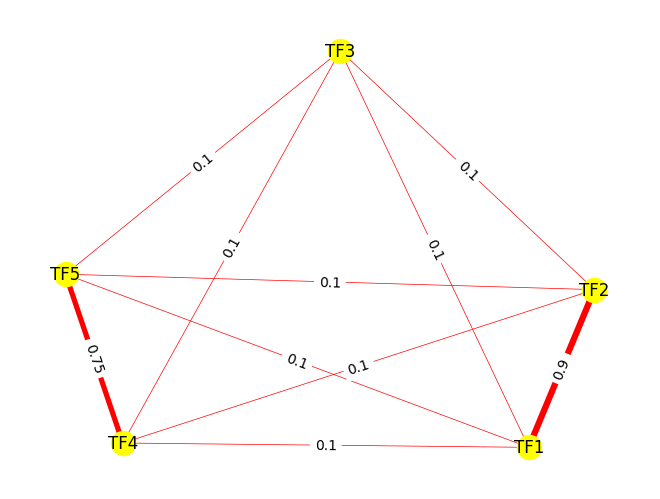

In [1]:
from gregulnetClasses import * # to load our package, GRegulNet
edge_list = [[1, 2, 0.9], [4, 5, 0.75], [1, 3], [1, 4], [1, 5], 
              [2, 3], [2, 4], [2, 5], [3, 4], [3, 5]]
beta_network_val = 10
# by default, cv_for_alpha_lasso_model_bool is False, so alpha_lasso_val will be specified.
alpha_lasso_val = 0.01

# Building the network regularized regression model. 
gregulnet_demo = geneRegulatNet(edge_list = edge_list, beta_network_val = beta_network_val,
                          alpha_lasso_val = alpha_lasso_val)

We can specify our $X$ and $y$ data to train our GRegulNet object using the *DemoDataBuilderXandY* class. In our demo, we utilize the *demo_dict* dictionary below to encode values for 3 parameters for our demo. Our class generates random data based on *num_samples_M* and *corrVals*. We specify *num_samples_M* is 100 samples. Further, we want the correlations of each of our predictors with the $y$ variable to be as provided by *corrVals*: [cor(TF$_{1}$, y) = 0.9, cor(TF$_{2}$, y) = 0.5, cor(TF$_{3}$, y) = 0.1, cor(TF$_{4}$, y) = -0.2, cor(TF$_{5}$, y) = -0.8]. Since *same_train_and_test_data_bool* is False, we will separate the data with 70% for training and 30% for testing.  There are additional parameters that we can adjust for our demo, but we wanted to retain simplicity. Please note that we explain more details about this class in *DemoDataBuilderXandY_explanation.ipynb*.
    
<!-- For simplicity, we will keep the training data the same as the testing data, by specifying *True* for *same_train_and_test_data_bool*.  -->



In [2]:
demo_dict = {"num_samples_M": 100,
            "corrVals": [0.9, 0.5, 0.1, -0.2, -0.8],
            "same_train_and_test_data_bool": False}

dummy_data = DemoDataBuilderXandY(**demo_dict)

X_train = dummy_data.X_train
y_train = dummy_data.y_train

# we can view the y_train data as a neat dataframe:
y_train_df = pd.DataFrame(y_train, columns = ["y"])
print(f"Training y (response) data: {y_train_df.shape[0]} rows. The first 5 rows:")
print(y_train_df.head())

# we can view the X_train data as a neat dataframe:
X_train_df = pd.DataFrame(X_train, columns = gregulnet_demo.tf_names_list)
print(f"\nTraining X (predictors) data: {X_train_df.shape[0]} rows for {X_train_df.shape[1]} predictors. The first 10 rows:")
X_train_df.head(10)

:) Please note that since we hold out 30.0% of our 100 samples for testing, we have:
:) X_train = 70 rows (samples) and 5 columns (N = 5 predictors) for training.
:) X_test = 30 rows (samples) and 5 columns (N = 5 predictors) for testing.
:) y_train = 70 corresponding rows (samples) for training.
:) y_test = 30 corresponding rows (samples) for testing.


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 4996.79it/s]

Training y (response) data: 70 rows. The first 5 rows:
          y
0  0.050186
1 -0.081154
2 -0.622764
3  0.783163
4  1.295948

Training X (predictors) data: 70 rows for 5 predictors. The first 10 rows:


TF1       TF2       TF3       TF4       TF5
0  0.902250  0.343490 -1.317465  1.404691  0.745724
1 -1.936549  1.110822 -0.696995  1.109920  0.028946
2  0.000611  2.197287 -0.074302  0.389102  2.369909
3  1.418952 -0.594274  0.705211  0.316235 -0.986833
4  1.944057  0.095329  0.838374 -0.469584 -0.271817
5 -3.036204 -2.121818  0.001455  2.002789  1.886874
6  0.718175 -1.053622  0.738562 -0.547582  0.026048
7 -2.090047 -1.448126  0.368563  1.855596  0.799289
8 -3.258704 -0.372644  1.294874  0.118021  1.888439
9  2.137793  0.381576  0.373323 -1.683666 -1.021895

To see all of the parameters (specified and default) that are used for the GRegulNet model:


In [3]:
gregulnet_demo.parameters_df

parameter       data type  \
0                       default_edge_weight            >= 0   
1                       consider_self_loops         boolean   
2           pseudocount_for_diagonal_matrix            >= 0   
3   use_edge_weight_values_for_degrees_bool         boolean   
4                      threshold_for_degree            >= 0   
5                                model_type  set of options   
6                      max_lasso_iterations            >= 1   
7       use_cross_validation_for_model_bool         boolean   
8                               alpha_lasso            >= 0   
9                               use_network         boolean   
10                             beta_network            >= 0   
11                     fit_y_intercept_bool         boolean   

                                          description  value  \
0   edge weight for any edge with missing weight info    0.1   
1   add 1 to the degree for each node (based on se...  False   
2   to ensure that no nodes have 0 degree value in...  0.001   
3   if False, we use a threshold instead to derive...  False   
4   edge weights > 0.5 are counted as 1 for the de...    0.5   
5   which model type should be used for geneRegula...  Lasso   
6               the maximum # of iterations for Lasso  Lasso   
7   should we use cross validation for training th...  False   
8               value for alpha for the lasso problem   0.01   
9   perform network regularization using a network...   True   
10  value of beta for the network regularization p...     10   
11       fit a y-intercept for our regression problem  False   

                class  
0   PriorGraphNetwork  
1   PriorGraphNetwork  
2   PriorGraphNetwork  
3   PriorGraphNetwork  
4   PriorGraphNetwork  
5           GRegulNet  
6           GRegulNet  
7           GRegulNet  
8           GRegulNet  
9           GRegulNet  
10          GRegulNet  
11          GRegulNet

Here, $gregulnet_{demo}$, is an object of the *GRegulNet* class. We fit a model using the $X_{train}$ and $y_{train}$ data sets.

In [4]:
gregulnet_demo.fit(X_train, y_train)

network used
Training GRegulNet :)


To view and extract the predicted model coefficients for the predictors: 

In [5]:
gregulnet_demo.coef

array([ 0.23655573,  0.11430656,  0.00148755, -0.03512912, -0.16009479])

In [6]:
gregulnet_demo.model_coefficients_df

y_intercept       TF1       TF2       TF3       TF4       TF5
0        None  0.236556  0.114307  0.001488 -0.035129 -0.160095

We can test the performance of our data on new, unseen data, to understand better the generalizability of our GRegulNet model on new data. 

In [7]:
y_test = dummy_data.y_test 
X_test = dummy_data.X_test

# we can view the y_train data as a neat dataframe:
y_test_df = pd.DataFrame(y_test, columns = ["y"])
print(f"Testing y (response) data: {y_test_df.shape[0]} rows. The first 5 rows:")
print(y_test_df.head())

# we can view the X_test data as a neat dataframe:
X_test_df = pd.DataFrame(X_test, columns = gregulnet_demo.tf_names_list)
print(f"\nTesting X (predictors) data: {X_test_df.shape[0]} rows for {X_test_df.shape[1]} predictors. The first 10 rows:")
X_test_df.head(10)

Testing y (response) data: 30 rows. The first 5 rows:
          y
0 -0.198628
1 -2.488737
2 -0.587804
3  0.287809
4  0.444063

Testing X (predictors) data: 30 rows for 5 predictors. The first 10 rows:


TF1       TF2       TF3       TF4       TF5
0  0.263202 -0.995175  0.248797 -0.755467 -1.484214
1 -7.034347 -0.720368 -0.535171  0.095236  0.607330
2  0.259201 -0.928826  0.051216 -0.999568  2.240629
3 -0.804365 -0.698938 -0.616339 -1.323494 -1.537090
4  0.675801 -0.790465  0.002748 -0.852372 -0.471373
5  4.388396  2.192212 -0.118921 -0.892500 -4.234699
6 -0.504579 -1.491449 -0.685401 -1.485232  0.816566
7 -4.194619 -2.003116 -0.370393 -0.719803  2.062496
8  2.284898  0.633291 -1.400780 -0.729766  0.913916
9  1.296446 -0.674408 -0.109297 -0.035722  0.045178

In [9]:
mse_test = gregulnet_demo.predict(X_test, y_test)
print(f"Please note that the testing Mean Square Error (MSE) is {mse_test}")

Testing GRegulnet :)
Please note that the testing Mean Square Error (MSE) is 0.020152051044508176


## References

[1]: Wilkinson, M.D., Dumontier, M., Aalbersberg, I.J. et al. The FAIR Guiding Principles for scientific data management and stewardship. Sci Data 3, 160018 (2016). https://doi.org/10.1038/sdata.2016.18

[2]: Zhang, Y., Akutsu, T., & Ching, W. K. (2016). Incorporating network topology and phylogenetic constraints for protein-protein interaction prediction. BMC bioinformatics, 17(1), 1-15. https://doi.org/10.1186/s12859-016-1310-4

[3]: Jia, C., Zhang, Y., Chen, K., & Zhang, S. (2018). A novel feature extraction method with improved consistency for identifying cell cycle regulated genes. Bioinformatics, 34(5), 896-903. https://doi.org/10.1093/bioinformatics/btx657

[4]: Lu, Y., Chen, X., & Hu, Z. (2017). Recognition of protein/gene names from text using an ensemble of classifiers and effective abbreviation resolution. BMC bioinformatics, 18(1), 1-11. https://doi.org/10.1186/s12859-017-1515-1

[5]: Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825-2830.

In [1]:
jupyter nbconvert --execute --to markdown README.ipynb


SyntaxError: invalid syntax (3612450416.py, line 1)